In [56]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [58]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ### 
df0 = pd.read_csv("Angola Development Indicators.csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ### 
df0.head()

,year,population,p population growth rate,Fertility Rate Total(birth per woman),Life Expectancy at Birth,Mortality rate(Per 1000 birth),Adolescent Fertility Rate,Unemployment Rate,Mortality rate for children below 5 years old(,hivp,High School Enrollment Rate,Elementary School Enrollment,PIB per capita (US dollar),PIB annual growth,PIB (IN US Dollars),Inflation,Industry,Agriculture,Imports of goods and services,Gross capital formation,Military expenditure (% of GDP),"Inflation, consumer prices (annual%)",CO2 emissions,Energy use,Electricity consumption,Total debt service,Official development assistance,"External debt shares, total","Foreign direct investment, net inflows",Area,Forest area,Arable land
0,1960,"5,454,933.00",1.369926,6.708,37.524,NaN,202.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100835,NaN,NaN,NaN,-5.000000e+04,NaN,NaN,NaN,NaN,NaN
1,1961,"5,531,472.00",1.393363,6.790,37.811,NaN,204.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082204,NaN,NaN,NaN,2.355000e+07,NaN,NaN,1246700.0,NaN,45.857063
2,1962,"5,608,539.00",1.383629,6.872,38.113,NaN,207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.210531,NaN,NaN,NaN,NaN,NaN,NaN,1246700.0,NaN,45.881126
3,1963,"5,679,458.00",1.256555,6.954,38.430,NaN,209.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202737,NaN,NaN,NaN,3.000000e+04,NaN,NaN,1246700.0,NaN,45.897169
4,1964,"5,735,044.00",0.973962,7.036,38.760,NaN,211.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213560,NaN,NaN,NaN,NaN,NaN,NaN,1246700.0,NaN,45.921232


In [59]:
# Gather basic information about the data
### YOUR CODE HERE ### 
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   year                                            58 non-null     int64  
 1   population                                      58 non-null     object 
 2   p population growth rate                        58 non-null     float64
 3   Fertility Rate Total(birth per woman)           58 non-null     float64
 4   Life Expectancy at Birth                        58 non-null     float64
 5   Mortality rate(Per 1000 birth)                  38 non-null     float64
 6   Adolescent Fertility Rate                       58 non-null     float64
 7   Unemployment Rate                               27 non-null     float64
 8   Mortality rate for children below 5 years old(  38 non-null     float64
 9   hivp                                         

In [60]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ### 
df0.describe()

,year,p population growth rate,Fertility Rate Total(birth per woman),Life Expectancy at Birth,Mortality rate(Per 1000 birth),Adolescent Fertility Rate,Unemployment Rate,Mortality rate for children below 5 years old(,hivp,High School Enrollment Rate,Elementary School Enrollment,PIB per capita (US dollar),PIB annual growth,PIB (IN US Dollars),Inflation,Industry,Agriculture,Imports of goods and services,Gross capital formation,Military expenditure (% of GDP),"Inflation, consumer prices (annual%)",CO2 emissions,Energy use,Electricity consumption,Total debt service,Official development assistance,"External debt shares, total","Foreign direct investment, net inflows",Area,Forest area,Arable land
count,58.000000,58.000000,58.000000,58.000000,38.000000,58.000000,27.000000,38.000000,28.000000,27.000000,24.000000,38.000000,37.000000,3.800000e+01,37.000000,23.000000,23.000000,18.000000,24.000000,33.000000,27.000000,55.000000,44.000000,44.000000,29.000000,5.600000e+01,4.800000e+01,4.700000e+01,57.0,27.000000,56.000000
mean,1988.500000,2.952154,6.918431,46.268172,110.250000,203.982466,16.418444,183.494737,1.214286,13.495769,89.732711,1772.651064,3.960832,3.890334e+10,326.440783,56.256424,7.044990,43.102624,21.813225,6.612008,408.496347,0.622688,507.659106,99.436634,15.051802,1.944621e+08,1.269326e+10,2.247604e+08,1246700.0,593535.999711,46.227813
std,16.886879,1.090068,0.555325,6.043685,28.912541,21.723286,6.678094,52.768259,0.583549,9.331974,22.699609,1668.784258,7.201727,4.667125e+10,894.635008,8.822022,1.969274,13.482722,13.408966,6.332773,939.783028,0.333207,57.708113,64.446905,9.591011,2.006117e+08,1.734643e+10,2.483444e+09,0.0,9905.692455,0.448710
min,1960.000000,-0.120653,5.600000,37.524000,53.400000,150.526000,7.139000,80.400000,0.200000,5.767480,58.570270,328.673295,-23.983417,4.438321e+09,-16.761082,41.933093,4.805339,23.252721,0.000000,0.000017,7.280387,0.082204,433.572531,49.264242,2.522402,-1.100000e+05,0.000000e+00,-7.397295e+09,1246700.0,577311.992200,45.857063
25%,1974.250000,3.219526,6.541500,42.460750,87.100000,191.091550,8.271500,140.650000,0.700000,8.820790,72.662680,620.831164,0.943576,6.647688e+09,3.560823,52.742716,5.842615,34.943414,17.475578,3.114054,13.393839,0.439508,466.935006,56.676814,8.374092,2.220750e+07,0.000000e+00,9.550000e+05,1246700.0,585424.003900,46.041550
50%,1988.500000,3.378646,7.050500,45.221500,126.300000,211.350000,20.438000,213.100000,1.300000,10.129640,79.428310,828.997925,4.082749,9.665347e+09,21.774300,56.075797,6.290257,40.609489,26.941144,4.177585,43.542107,0.551349,491.890594,70.618879,12.139541,1.652900e+08,9.104694e+09,1.158100e+08,1246700.0,593536.015600,46.041550
75%,2002.750000,3.550932,7.447000,48.255500,132.100000,222.654000,21.357500,223.600000,1.725000,13.809430,105.330418,3122.584484,7.274277,6.904699e+10,106.309982,60.579867,7.851717,48.721446,30.493185,5.972268,233.686312,0.724596,536.473088,118.510474,19.227731,2.925950e+08,1.160945e+10,5.684635e+08,1246700.0,601647.988300,46.139809
max,2017.000000,3.989233,7.500000,60.379000,140.700000,225.000000,23.924999,238.100000,2.000000,50.671480,142.744090,5408.410496,15.028915,1.460000e+11,4800.531644,72.717372,12.911182,74.946851,42.820859,22.250000,4145.105982,1.330219,663.452749,312.228825,41.415873,1.144570e+09,5.716739e+10,1.002822e+10,1246700.0,609760.000000,47.477340


In [61]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

year                                               0
population                                         0
p population growth rate                           0
Fertility Rate Total(birth per woman)              0
Life Expectancy at Birth                           0
Mortality rate(Per 1000 birth)                    20
Adolescent Fertility Rate                          0
Unemployment Rate                                 31
Mortality rate for children below 5 years old(    20
hivp                                              30
High School Enrollment Rate                       31
Elementary School Enrollment                      34
PIB per capita (US dollar)                        20
PIB annual growth                                 21
PIB (IN US Dollars)                               20
Inflation                                         21
Industry                                          35
Agriculture                                       35
Imports of goods and services                 

In [62]:
# Eliminar filas que contienen al menos un valor nulo
df0 = df0.dropna()

# Verificar si quedan valores nulos
print(df0.isnull().sum())

year                                              0
population                                        0
p population growth rate                          0
Fertility Rate Total(birth per woman)             0
Life Expectancy at Birth                          0
Mortality rate(Per 1000 birth)                    0
Adolescent Fertility Rate                         0
Unemployment Rate                                 0
Mortality rate for children below 5 years old(    0
hivp                                              0
High School Enrollment Rate                       0
Elementary School Enrollment                      0
PIB per capita (US dollar)                        0
PIB annual growth                                 0
PIB (IN US Dollars)                               0
Inflation                                         0
Industry                                          0
Agriculture                                       0
Imports of goods and services                     0
Gross capita

In [63]:
# Eliminar valores nulos
df0 = df0.dropna()

# Eliminar filas duplicadas
df0 = df0.drop_duplicates()

# Verificar el resultado
print("Valores nulos restantes:", df0.isnull().sum().sum())
print("Filas duplicadas restantes:", df0.duplicated().sum())

Valores nulos restantes: 0
Filas duplicadas restantes: 0


In [64]:
print(df0.info())  # Verificar estructura del DataFrame
print(df0.isnull().sum())  # Verificar valores nulos restantes
print(df0.duplicated().sum())  # Verificar duplicados restantes

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 48 to 51
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   year                                            4 non-null      int64  
 1   population                                      4 non-null      object 
 2   p population growth rate                        4 non-null      float64
 3   Fertility Rate Total(birth per woman)           4 non-null      float64
 4   Life Expectancy at Birth                        4 non-null      float64
 5   Mortality rate(Per 1000 birth)                  4 non-null      float64
 6   Adolescent Fertility Rate                       4 non-null      float64
 7   Unemployment Rate                               4 non-null      float64
 8   Mortality rate for children below 5 years old(  4 non-null      float64
 9   hivp                                            4 

In [65]:
# Convertir la columna 'population' a numérica
df0['population'] = pd.to_numeric(df0['population'], errors='coerce')

# Verificar si hay valores nulos después de la conversión
print(df0['population'].isnull().sum())

4


In [66]:
import pandas as pd

# Cargar los datos
df0 = pd.read_csv("Angola Development Indicators.csv")

# Inspeccionar los valores únicos en 'population'
print("Valores únicos en 'population':", df0['population'].unique())

# Limpiar y convertir la columna 'population'
def convert_population(value):
    if isinstance(value, str):
        value = value.replace(',', '').replace(' ', '')  # Eliminar comas y espacios
        if 'million' in value:
            return float(value.replace(' million', '')) * 1_000_000
        elif 'billion' in value:
            return float(value.replace(' billion', '')) * 1_000_000_000
        else:
            return float(value)
    return value

df0['population'] = df0['population'].apply(convert_population)

# Verificar el resultado
print("Valores en 'population' después de la conversión:")
print(df0['population'])
print("Valores nulos en 'population':", df0['population'].isnull().sum())

Valores únicos en 'population': ['5,454,933.00' '5,531,472.00' '5,608,539.00' '5,679,458.00'
 '5,735,044.00' '5,770,570.00' '5,781,214.00' '5,774,243.00'
 '5,771,652.00' '5,803,254.00' '5,890,365.00' '6,040,777.00'
 '6,248,552.00' '6,496,962.00' '6,761,380.00' '7,024,000.00'
 '7,279,509.00' '7,533,735.00' '7,790,707.00' '8,058,067.00'
 '8,341,289.00' '8,640,446.00' '8,952,950.00' '9,278,096.00'
 '9,614,754.00' '9,961,997.00' '10,320,111.00' '10,689,250.00'
 '11,068,050.00' '11,454,777.00' '11,848,386.00' '12,248,901.00'
 '12,657,366.00' '13,075,049.00' '13,503,747.00' '13,945,206.00'
 '14,400,719.00' '14,871,570.00' '15,359,601.00' '15,866,869.00'
 '16,395,473.00' '16,945,753.00' '17,519,417.00' '18,121,479.00'
 '18,758,145.00' '19,433,602.00' '20,149,901.00' '20,905,363.00'
 '21,695,634.00' '22,514,281.00' '23,356,246.00' '24,220,661.00'
 '25,107,931.00' '26,015,780.00' '26,941,779.00' '27,884,381.00'
 '28,842,484.00' '29,816,748.00']
Valores en 'population' después de la conversión:


In [67]:
print(df0['population'])
print(df0['population'].isnull().sum())

0      5454933.0
1      5531472.0
2      5608539.0
3      5679458.0
4      5735044.0
5      5770570.0
6      5781214.0
7      5774243.0
8      5771652.0
9      5803254.0
10     5890365.0
11     6040777.0
12     6248552.0
13     6496962.0
14     6761380.0
15     7024000.0
16     7279509.0
17     7533735.0
18     7790707.0
19     8058067.0
20     8341289.0
21     8640446.0
22     8952950.0
23     9278096.0
24     9614754.0
25     9961997.0
26    10320111.0
27    10689250.0
28    11068050.0
29    11454777.0
30    11848386.0
31    12248901.0
32    12657366.0
33    13075049.0
34    13503747.0
35    13945206.0
36    14400719.0
37    14871570.0
38    15359601.0
39    15866869.0
40    16395473.0
41    16945753.0
42    17519417.0
43    18121479.0
44    18758145.0
45    19433602.0
46    20149901.0
47    20905363.0
48    21695634.0
49    22514281.0
50    23356246.0
51    24220661.0
52    25107931.0
53    26015780.0
54    26941779.0
55    27884381.0
56    28842484.0
57    29816748.0
Name: populati

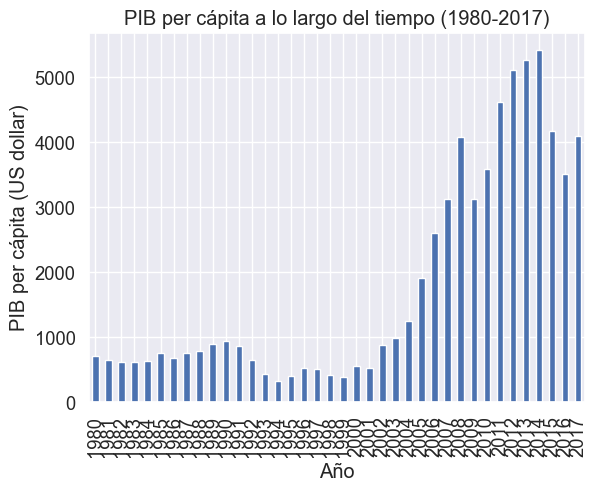

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df0 es tu DataFrame y ya tiene los datos necesarios
# df0 = pd.read_csv('tu_archivo.csv')  # Cargar datos si es necesario

# Filtrar los datos desde 1980 hasta 2017
df0 = df0[(df0['year'] >= 1980) & (df0['year'] <= 2017)]

# Crear el gráfico de barras
df0.plot(kind='bar', x='year', y='PIB per capita (US dollar)', legend=False)

# Añadir título y etiquetas
plt.title("PIB per cápita a lo largo del tiempo (1980-2017)")
plt.ylabel("PIB per cápita (US dollar)")
plt.xlabel("Año")

# Mostrar el gráfico
plt.show()

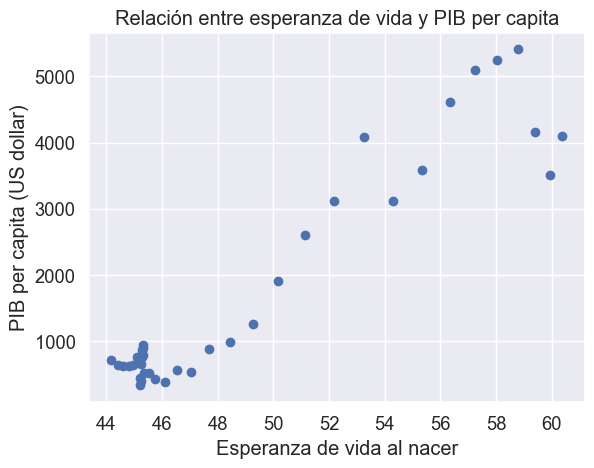

In [69]:
plt.scatter(df0['Life Expectancy at Birth'], df0['PIB per capita (US dollar)'])
plt.xlabel("Esperanza de vida al nacer")
plt.ylabel("PIB per capita (US dollar)")
plt.title("Relación entre esperanza de vida y PIB per capita")
plt.show()

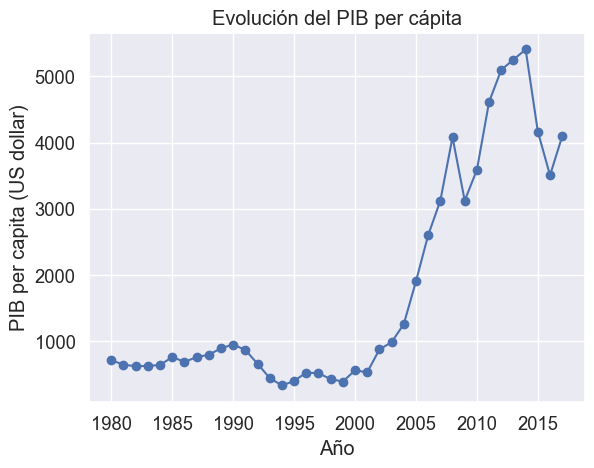

In [70]:
plt.plot(df0['year'], df0['PIB per capita (US dollar)'], marker='o')
plt.xlabel("Año")
plt.ylabel("PIB per capita (US dollar)")
plt.title("Evolución del PIB per cápita")
plt.show()

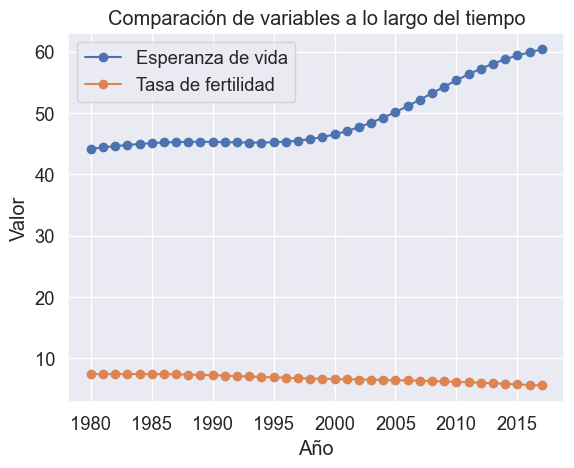

In [71]:
plt.plot(df0['year'], df0['Life Expectancy at Birth'], marker='o', label="Esperanza de vida")
plt.plot(df0['year'], df0['Fertility Rate Total(birth per woman)'], marker='o', label="Tasa de fertilidad")
plt.xlabel("Año")
plt.ylabel("Valor")
plt.title("Comparación de variables a lo largo del tiempo")
plt.legend()
plt.show()

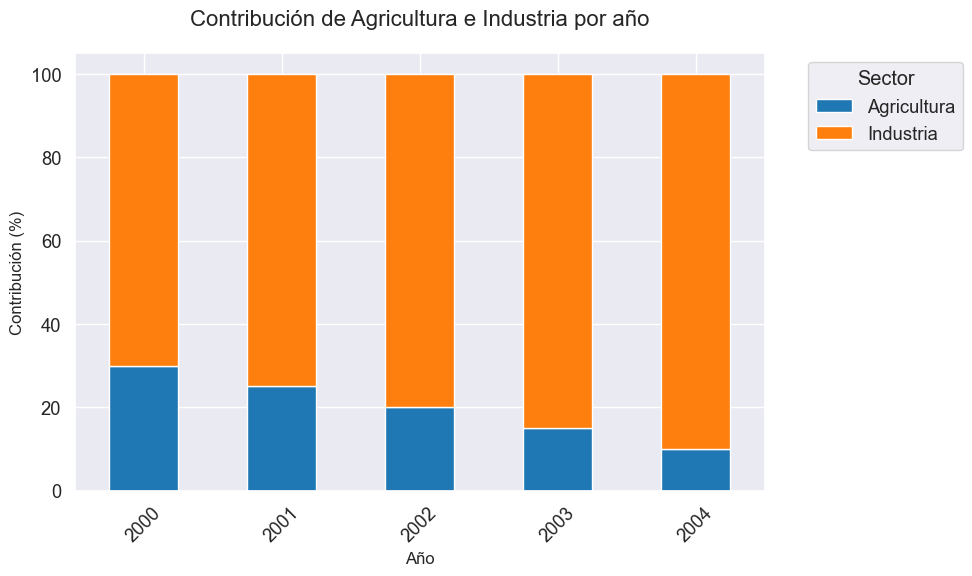

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    'year': [2000, 2001, 2002, 2003, 2004],
    'Agricultura': [30, 25, 20, 15, 10],
    'Industria': [70, 75, 80, 85, 90]
}
df0 = pd.DataFrame(data)

# Configurar el DataFrame
df0.set_index('year')[['Agricultura', 'Industria']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e']
)

# Añadir título y etiquetas
plt.title("Contribución de Agricultura e Industria por año", fontsize=16, pad=20)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Contribución (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()